In [2]:
import numpy as np    # si pas encore fait
from sklearn.utils import shuffle

# génération 100 points 3D suivant loi normale centrée
# chaque groupe est translaté d'un vecteur [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# génération des étiquettes de chaque groupe
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concaténation des données dans une matrice
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# permutation aléatoire des lignes de la matrice data
data, labels = shuffle(data, labels)



(500, 3)


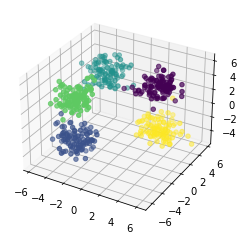

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# La couleur des points dépend de leur étiquette (label)
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

In [5]:
pred = kmeans.predict(data)

In [6]:
print(kmeans.labels_)

[4 3 2 1 0 2 1 4 1 0 2 0 0 0 0 4 1 3 2 4 0 3 0 3 4 4 3 0 4 4 1 0 4 4 4 1 1
 3 2 4 2 4 2 1 2 0 2 3 2 0 4 2 0 1 2 3 3 2 0 0 4 3 1 2 1 2 2 3 2 1 4 2 1 2
 2 3 0 4 3 4 0 0 2 0 3 3 2 0 4 3 0 4 3 4 1 1 2 1 4 1 2 1 0 1 3 3 4 1 0 4 2
 3 2 1 4 4 2 4 2 2 3 4 1 3 3 4 1 0 3 4 4 0 0 2 3 4 2 2 2 3 4 1 0 1 0 1 1 1
 1 0 1 4 2 4 1 4 0 0 0 3 0 0 4 3 3 3 2 4 0 3 0 1 0 0 4 0 1 3 0 1 1 2 1 2 1
 4 0 2 2 3 0 4 1 1 2 2 4 3 1 4 0 3 2 3 4 3 3 4 0 1 0 0 4 0 3 4 4 3 2 4 1 1
 3 3 0 1 1 3 3 4 0 3 0 0 3 4 1 0 1 1 0 0 2 3 2 3 1 2 0 0 0 0 3 3 1 4 0 0 2
 2 2 0 1 2 1 2 0 0 0 0 2 3 0 3 2 1 2 3 1 0 4 3 4 0 1 3 2 1 0 2 1 0 4 2 3 4
 4 4 1 3 2 0 0 1 2 3 0 1 1 2 1 2 0 4 0 0 3 1 4 3 2 2 0 3 1 2 4 3 0 1 0 1 4
 4 1 2 2 3 2 3 3 4 1 3 2 2 0 4 0 1 3 3 1 1 2 4 2 3 4 0 4 2 4 4 1 3 1 3 0 1
 2 2 4 2 3 1 0 3 0 2 1 3 4 1 2 1 2 4 2 2 4 1 3 4 1 2 4 1 1 3 3 3 4 1 0 1 0
 4 3 0 3 4 3 4 2 0 3 2 3 0 0 3 4 0 3 0 3 4 4 3 3 0 1 2 4 1 2 1 1 2 2 4 4 2
 3 2 1 3 1 4 1 2 2 4 1 4 2 1 2 3 3 1 0 4 3 2 0 2 4 3 2 4 3 1 4 3 3 1 1 4 4
 2 0 3 4 2 4 4 2 1 2 4 0 

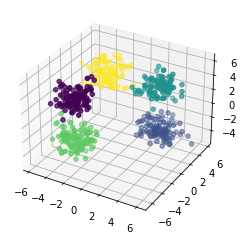

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

In [9]:
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)


0.9899949500767691

In [10]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.7043634087012894

In [23]:
import pandas as pd

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1), (np.nan, 1)],
                  columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)

# np.minimum(df.dogs, df.cats).sum().round(decimals=2)
# df


,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0
